## Final Project Submission

Please fill out: 
* Student name: Victoria Mwendwa Nabea
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL: 


# MICROSOFT MOVIE STUDIO PROPOSAL ANALYSIS

**Author:** Victoria Mwendwa Nabea

![microsoft](images/micr)![film](images/film.jpeg)

# Overview
Microsoft is interested in creating a new movie studio to compete with other big companies that are creating original video content. However, Microsoft has limited knowledge about creating movies. To help the head of Microsoft's new movie studio make informed decisions about the type of films to create, the company needs to explore the types of films that are currently doing well at the box office. This exploration will provide actionable insights that will guide the company's decision-making process regarding the creation of new films. By analyzing the current trends and success factors in the film industry, Microsoft will be better positioned to make informed decisions that will enable them to succeed in the highly competitive market.

# Business Problem
Microsoft wants to create a movie studio but lacks knowledge about creating movies. I will explore the most successful types of films at the box office and provide insights to guide the head of the new movie studio in deciding what type of films to create.

# Data
To conduct the analysis on the most successful types of films at the box office, I obtained data from various sources on the internet. These sources include the TMDB dataset, BOM movies, reviews, and movie budgets. These datasets provide information on box office revenues, movie budgets, and other relevant information that can help identify successful film genres and provide actionable insights for Microsoft's new movie studio.

# Methods
To analyze the data and identify successful film genres, various methods were used. The analysis involved examining box office revenues, movie budgets, and other relevant information, such as genre and release date. Statistical analysis was performed to identify patterns and trends in the data. These methods allowed for a comprehensive analysis of the data and provided actionable insights to guide Microsoft's decision-making process for creating successful films.


## Our analysis focuses on four major questions
1. Which are the highest rating income generating movies and what genres are they, which studio produces the highest grossing movies?
2. What is the average runtime of movies and what would be the reccomended runtime for movies to be produces in the studio?
3.  How many movies are relased per year from 2010 to present(2018 as per our datset)? Is there a correlation between a movie's popularity and its rating?
4.  What is the relationship between the movie budget and the gross income generated?

# BOM MOVIE GROSS ANALYSIS

## QUESTION 1:  Which are the highest rating income generating movies and what genres are they? 
To find this out, I compared the domestic gross, the foreign gross and the calculated worldwide gross of the top 10 grossing movies in each category(domestic, foreign or worldwide). This will not only help in identifying which genres generate the highest incomes but also help in knowing the magnitude of marketing resourses to pour where.**

**We start by importing the necessary python libraries to help us run codes for analysis of our data. That is, Pandas, numpy, Matplotlib, Seaborn, and sqlite3**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns 
%matplotlib inline

**load the dataset bom.movie_gross.csv**

In [2]:
bom_df = pd.read_csv("bom.movie_gross.csv")
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


**In order to understand this dataset, I will frequently use the .shape, .info() and .describe() methods on the bom.df dataframe**

In [3]:
bom_df.shape

(3387, 5)

In [4]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
bom_df.count()

title             3387
studio            3382
domestic_gross    3359
foreign_gross     2037
year              3387
dtype: int64

## DATA CLEANING

**Check for duplicate rows**

In [6]:
bom_df.duplicated().sum()

0

**Dropping the null values in the domestic_gross, studio and foreign_gross columns because filling in the null values in these columns might result to misleading values.**

In [7]:
bom_df.dropna(subset=['domestic_gross','studio','foreign_gross'], inplace=True)
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [8]:
bom_df['domestic_gross'].value_counts()

1500000.0     14
1000000.0     13
1300000.0     12
1100000.0     11
1600000.0     10
              ..
64300000.0     1
41100000.0     1
46400000.0     1
677000.0       1
45900000.0     1
Name: domestic_gross, Length: 1295, dtype: int64

**Changing the data type of domestic_gross from float to int data type**

In [9]:
bom_df['domestic_gross'] = bom_df['domestic_gross'].astype(int)
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010
3,Inception,WB,292600000,535700000,2010
4,Shrek Forever After,P/DW,238700000,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400,1500000,2018
3286,The Catcher Was a Spy,IFC,725000,229000,2018
3309,Time Freak,Grindstone,10000,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200,5200,2018


**Changing the values of the foreign_gross to numeric values since we cannot add up real numbers to what appeared to be string values in our foreign_gross column.**

In [10]:
bom_df['foreign_gross'] = pd.to_numeric(bom_df['foreign_gross'], errors='coerce')
bom_df['foreign_gross']

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3275      1500000.0
3286       229000.0
3309       256000.0
3342         5200.0
3353        30000.0
Name: foreign_gross, Length: 2007, dtype: float64

**calculating the total_gross or rather worldwide gross by adding up values in the columns domestic_gross and foreign gross**

In [11]:
bom_df['total_gross'] = bom_df['domestic_gross']+bom_df['foreign_gross']

bom_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000,513900000.0,2010,7.526000e+08


**To get a bit more information about the columns in the dataframe using .info()**

In [12]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   int64  
 3   foreign_gross   2002 non-null   float64
 4   year            2007 non-null   int64  
 5   total_gross     2002 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 109.8+ KB


In [13]:
bom_df.describe()

,domestic_gross,foreign_gross,year,total_gross
count,2.007000e+03,2.002000e+03,2007.000000,2.002000e+03
mean,4.701984e+07,7.597967e+07,2013.506228,1.216950e+08
std,8.162689e+07,1.383001e+08,2.597997,2.062245e+08
min,4.000000e+02,6.000000e+02,2010.000000,4.900000e+03
25%,6.700000e+05,4.000000e+06,2011.000000,8.155750e+06
50%,1.670000e+07,1.960000e+07,2013.000000,4.220000e+07
75%,5.605000e+07,7.645000e+07,2016.000000,1.327750e+08
max,9.367000e+08,9.605000e+08,2018.000000,1.518900e+09


##  DOMESTIC GROSS ANALYSIS


### Which movies are the top 10 highest income generating domestically?

In [14]:
sorted_domestic_gross_df = bom_df.sort_values(by='domestic_gross', ascending=False)
top_10_dom_df = sorted_domestic_gross_df.head(10)
top_10_dom_df

,title,studio,domestic_gross,foreign_gross,year,total_gross
1872,Star Wars: The Force Awakens,BV,936700000,NaN,2015,NaN
3080,Black Panther,BV,700100000,646900000.0,2018,1.347000e+09
3079,Avengers: Infinity War,BV,678800000,NaN,2018,NaN
1873,Jurassic World,Uni.,652300000,NaN,2015,NaN
727,Marvel's The Avengers,BV,623400000,895500000.0,2012,1.518900e+09
2758,Star Wars: The Last Jedi,BV,620200000,712400000.0,2017,1.332600e+09
3082,Incredibles 2,BV,608600000,634200000.0,2018,1.242800e+09
2323,Rogue One: A Star Wars Story,BV,532200000,523900000.0,2016,1.056100e+09
2759,Beauty and the Beast (2017),BV,504000000,759500000.0,2017,1.263500e+09
2324,Finding Dory,BV,486300000,542300000.0,2016,1.028600e+09


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

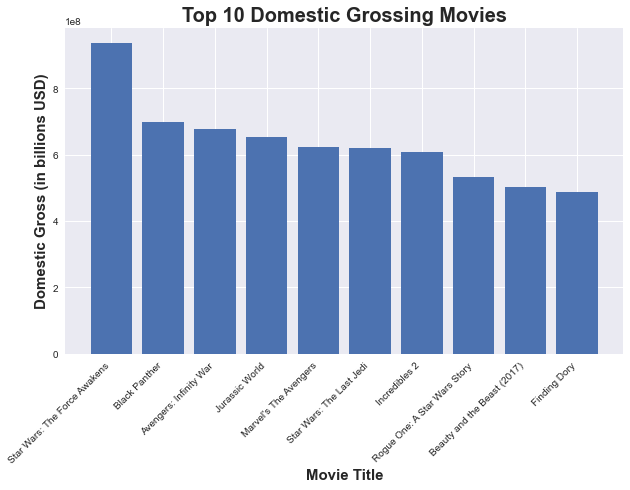

In [15]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))

plt.bar(top_10_dom_df['title'], top_10_dom_df['domestic_gross'])
plt.title('Top 10 Domestic Grossing Movies', fontsize=20, fontweight='bold')
plt.xlabel('Movie Title', fontsize=15, fontweight='bold')
plt.ylabel('Domestic Gross (in billions USD)', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, ha='right')

From the bar plot above, we can draw some insights.
first, I am going to use google to find out the genres as follows
1. Star Wars: The Force Awakens - sci-fi/adventure
2. Black Panther - Action/sci-fi
3. Avengers: Infinity War - Action/sci-fi
4. Jurrasic World - sci-fi/sci-fi
5. Marvel's The Avengers - Adventure/Action
6. Star Wars: The Last Jedi - sci-fi/action
7. Incredibles 2 - family/adventure
8. Rogue 1: A star Wars Story - sci-fi/action
9. Beauty and the Beast - mucical/fantasy
10. Finding Dory - family/adventure

From the data above, we can see that sci-fi genre does pretty well for the domestic Market

## FOREIGN GROSS ANALYSIS

### Which movies are the top 10 highest income generating in foreign markets?

In [16]:
sorted_foreign_gross_df = bom_df.sort_values(by='foreign_gross', ascending=False)
top_10_for_df = sorted_foreign_gross_df.head(10)
top_10_for_df

,title,studio,domestic_gross,foreign_gross,year,total_gross
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000,960500000.0,2011,1.341500e+09
1875,Avengers: Age of Ultron,BV,459000000,946400000.0,2015,1.405400e+09
727,Marvel's The Avengers,BV,623400000,895500000.0,2012,1.518900e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000,891800000.0,2018,1.309500e+09
1127,Frozen,BV,400700000,875700000.0,2013,1.276400e+09
2764,Wolf Warrior 2,HC,2700000,867600000.0,2017,8.703000e+08
1477,Transformers: Age of Extinction,Par.,245400000,858600000.0,2014,1.104000e+09
1876,Minions,Uni.,336000000,823400000.0,2015,1.159400e+09
3083,Aquaman,WB,335100000,812700000.0,2018,1.147800e+09
1128,Iron Man 3,BV,409000000,805800000.0,2013,1.214800e+09


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

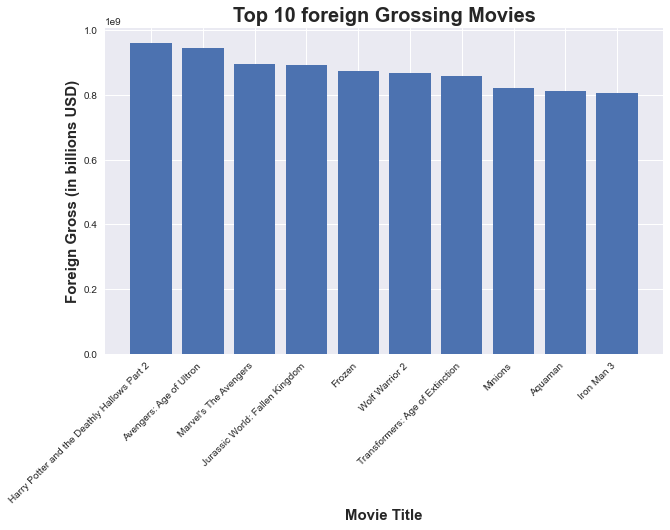

In [17]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))

plt.bar(top_10_for_df['title'], top_10_for_df['foreign_gross'])
plt.title('Top 10 foreign Grossing Movies', fontsize=20, fontweight='bold')
plt.xlabel('Movie Title', fontsize=15, fontweight='bold')
plt.ylabel('Foreign Gross (in billions USD)', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, ha='right')

From the bar plot above, we can draw some insights.
first, I am going to use google to find out the genres as follows
1. Harry Potter and the deathly hallows part 2 - fantasy/fantasy
2. Avengers: age of ultron - action/adventure
3. Marvel's The Avengers - Adventure/Action
4. Jurrasic World: fallen kingdom - sci-fi/sci-fi
5. Frozen - family/musical
6. Wolf worrior 2 - action/ war
7. Transformers: age of extinction - action/scifi
8. Minions -  comedy/ adventure
9. Aquaman - action/adventure
10. Iron man action/adventure

From the data above, we can see that action/adventure genre does pretty well for the foreign Market

## WORLDWIDE GROSS ANALYSIS

### Which movies are the top 10 highest income generating worldwide?

In [18]:
sorted_total_gross_df = bom_df.sort_values(by='total_gross', ascending=False)
top_10_df = sorted_total_gross_df.head(10)
top_10_df

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000,712400000.0,2017,1.332600e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000,891800000.0,2018,1.309500e+09
1127,Frozen,BV,400700000,875700000.0,2013,1.276400e+09
2759,Beauty and the Beast (2017),BV,504000000,759500000.0,2017,1.263500e+09
3082,Incredibles 2,BV,608600000,634200000.0,2018,1.242800e+09
1128,Iron Man 3,BV,409000000,805800000.0,2013,1.214800e+09


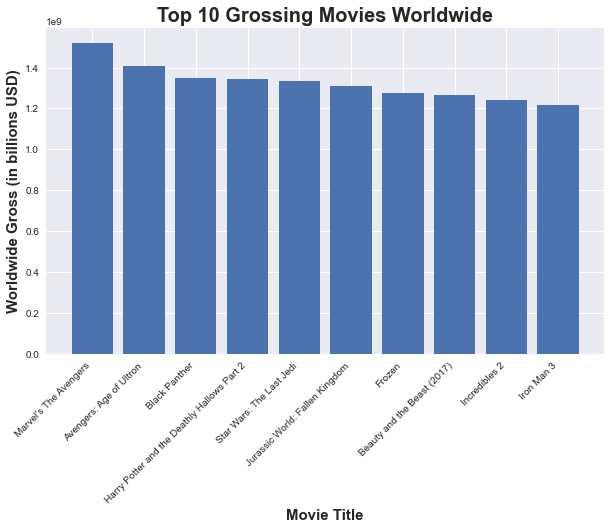

In [19]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))

plt.bar(top_10_df['title'], top_10_df['total_gross'])
plt.title('Top 10 Grossing Movies Worldwide', fontsize=20, fontweight='bold')
plt.xlabel('Movie Title', fontsize=15, fontweight='bold')
plt.ylabel('Worldwide Gross (in billions USD)', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

### Getting value counts for the studios producing the top 10 movies. this wil give us an insight on which studio has been producing some of the most successful movies

From the bar plot above, we can draw some insights.
first, I am going to use google to find out the genres as follows
1. Marvel's The Avengers - Adventure/ActionHarry Potter and the deathly hallows part 2 - fantasy/fantasy
2. Avengers: age of ultron - action/adventure
3. Black panther - action/adventure
4. Harry Potter and the deathly hallows part 2 - fantasy/fantasy
5. Star wars the last jedi - scifi/action
6. Jurrasic World: fallen kingdom - sci-fi/sci-fi
7. Frozen - family/musical
8. beauty and the beast - musical/fantasy
9. incredibles 2 - family/adventure
10. Iron man 3 - action/adventure

From the data above, we can see that action/adventure, fantasy and scifi genres does pretty well for the worldwide/ international Market

In [20]:
top_10_df['studio'].value_counts()

BV      8
WB      1
Uni.    1
Name: studio, dtype: int64

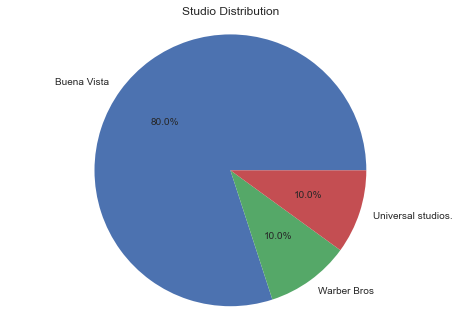

In [21]:
data = [8, 1, 1]
labels = ['Buena Vista', 'Warber Bros', 'Universal studios.']

fig, ax = plt.subplots()
ax.pie(data, labels=labels, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Studio Distribution')
plt.show()

# ANALYZING MOVIE INFO DATASET

# Question 2: What is the average runtime of movies and what would be the reccomended runtime for movies to be produces in the studio?
For this question I focus on find the 75th percentile average on the movie runtimes and we shall see why. For my analysis in this dataset, I am highly interested in the runtime column

**Start by loading our data from the file called rt.movie_info.tsv into a pandas dataframe called movie_info_df**

In [22]:
movie_info_df= pd.read_csv("rt.movie_info.tsv", delimiter='\t')
movie_info_df.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


**To get a feel of what our data contains, we use the .info() method.**

In [23]:
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


1. **from the info generated above, we can see that the column runtime has some missing values, 30 of them, which are not so many.**
2. **We can also take note that the data type is an object, which is clearly a string and we cannot perform mathematical computations on strings.**
3. **We now need to convert that sting ro a real number, int or float, by:**
    **a)removing the minutes word first.**

In [24]:

#CODE TO REMOVE THE WORD MINUTES
movie_info_df['runtime'] = movie_info_df['runtime'].str.replace('minutes', '')
movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200,NaN


**B) We fill the mssing values with 0. This will help us in computation since we cannot do that with rows that contain null values**

In [25]:
movie_info_df['runtime']= movie_info_df['runtime'].fillna(0)
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1560 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


**C) To finish off, we convert the result to number values that will be recognized by the computer for computation.**

**We then use a .describe() method to get the mean and percentiles of our interest.**

In [26]:
movie_info_df['runtime']= pd.to_numeric(movie_info_df.runtime,errors="coerce")
movie_info_df['runtime'].describe()

count    1560.000000
mean      101.968590
std        28.276622
min         0.000000
25%        90.000000
50%       100.000000
75%       114.000000
max       358.000000
Name: runtime, dtype: float64

In [27]:
movie_info_df['runtime'].mean()

101.96858974358975

From the analyis above, we can conclude that the average movie length is 101 minutes, with the shortest movie being 5 minutes long and the longest one being 358 minutes long.

In my analysis I choose to use the 75th percentie to be my average , because I want to tend to a longer movie which could be affected by the shorter movies durign the calculauion of the mean. 

This decision is also based on intuition and my experience with the movies I have watched. it only makes sense to watch a longer movie as compared to a shorter movie.

# ANALYZING TMDB DATASET


## Question 3: How many movies are relased per year from 2010 to present(2018 as per our datset)? Is there a correlation between a movie's popularity and its rating? 

To find this out, we shall start by finding out the number of movies released per year and plot a visualization on the data we get

**Start by loading our tmdb.movies.csv dataset**

In [28]:
tmdb_df = pd.read_csv("tmdb.movies.csv")
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


**To understand the size of our dataset, we start by finding the shape(dimentionality) of our dataframe**

In [29]:
tmdb_df.shape

(26517, 10)

**Finding out if there are any null values in the columns, we use the df.info() and thereafter .describe to get a summary of the descriptive statistics of our DataFrame.**

In [30]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [31]:
tmdb_df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


**Notice that the date is not written in a format suitable for plotting or any numerical analysis. we also need to strip off the year only in order to have an aggregate of the movies released that year.**

**We start by changing the date datatype to date time format.**

In [32]:
tmdb_df['release_date'] =  pd.to_datetime(tmdb_df['release_date'], format = '%Y-%m-%d')
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         26517 non-null  int64         
 1   genre_ids          26517 non-null  object        
 2   id                 26517 non-null  int64         
 3   original_language  26517 non-null  object        
 4   original_title     26517 non-null  object        
 5   popularity         26517 non-null  float64       
 6   release_date       26517 non-null  datetime64[ns]
 7   title              26517 non-null  object        
 8   vote_average       26517 non-null  float64       
 9   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 2.0+ MB


**Then I created another column called Years which I loaded the stripped year values only on the column.**

In [33]:
tmdb_df['Years'] = tmdb_df['release_date'].dt.strftime('%Y')
tmdb_df['Years']

0        2010
1        2010
2        2010
3        1995
4        2010
         ... 
26512    2018
26513    2018
26514    2018
26515    2018
26516    2018
Name: Years, Length: 26517, dtype: object

In [34]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         26517 non-null  int64         
 1   genre_ids          26517 non-null  object        
 2   id                 26517 non-null  int64         
 3   original_language  26517 non-null  object        
 4   original_title     26517 non-null  object        
 5   popularity         26517 non-null  float64       
 6   release_date       26517 non-null  datetime64[ns]
 7   title              26517 non-null  object        
 8   vote_average       26517 non-null  float64       
 9   vote_count         26517 non-null  int64         
 10  Years              26517 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 2.2+ MB


**Here is a preview of that the dataframe now looks like**

In [35]:
tmdb_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,Years
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010
...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,2018
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,2018
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,2018
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,2018


**Now we use the .sort_values function to sort thr years in ascending order**

In [36]:
sorted_years_df = tmdb_df.sort_values(by='Years', ascending = True)
s_years = sorted_years_df
s_years

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,Years
14335,14335,"[18, 10752]",143,en,All Quiet on the Western Front,9.583,1930-04-29,All Quiet on the Western Front,7.8,299,1930
21758,21758,"[27, 53]",43148,en,The Vampire Bat,2.292,1933-01-21,The Vampire Bat,5.6,23,1933
3580,3580,"[35, 18, 10749]",263768,fr,Le Bonheur,1.653,1936-02-27,Le Bonheur,8.7,3,1936
26345,26345,[],316707,en,How Walt Disney Cartoons Are Made,0.600,1939-01-19,How Walt Disney Cartoons Are Made,7.3,3,1939
11192,11192,"[18, 36, 10749]",887,en,The Best Years of Our Lives,9.647,1946-12-25,The Best Years of Our Lives,7.8,243,1946
...,...,...,...,...,...,...,...,...,...,...,...
24714,24714,"[35, 18]",424651,en,Untogether,5.139,2019-02-08,Untogether,6.9,8,2019
26059,26059,[14],586037,en,We Are Boats,0.828,2019-03-08,We Are Boats,4.5,2,2019
24598,24598,"[53, 18, 27]",510284,en,Braid,5.972,2019-02-01,Braid,6.4,18,2019
25429,25429,"[16, 35, 10751, 12]",528644,en,Bilby,2.024,2019-02-22,Bilby,5.0,6,2019


**After sorting, I had plotted a bar graph that showed a lot of negative space rom the year 1930 to 2009. seems like the dataset started to get movie records from the year 2010**

**So I created a dataframe that stores the records from the year 2010 as follows. and first, i converted the years into int datatype for easier compuation of valuecounts.**

In [37]:
s_years['Years']=s_years['Years'].astype(int)
df_new=s_years[s_years['Years'] >2009]
df_new.Years.value_counts()

2015    3258
2016    3192
2013    3147
2017    3145
2014    3137
2011    2696
2012    2659
2018    2587
2010    2406
2019      63
2020       1
Name: Years, dtype: int64

**Here is where beauty came to life. I used the seaborn library to plot a bar graph of the movie counts per year**

/Users/apple/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


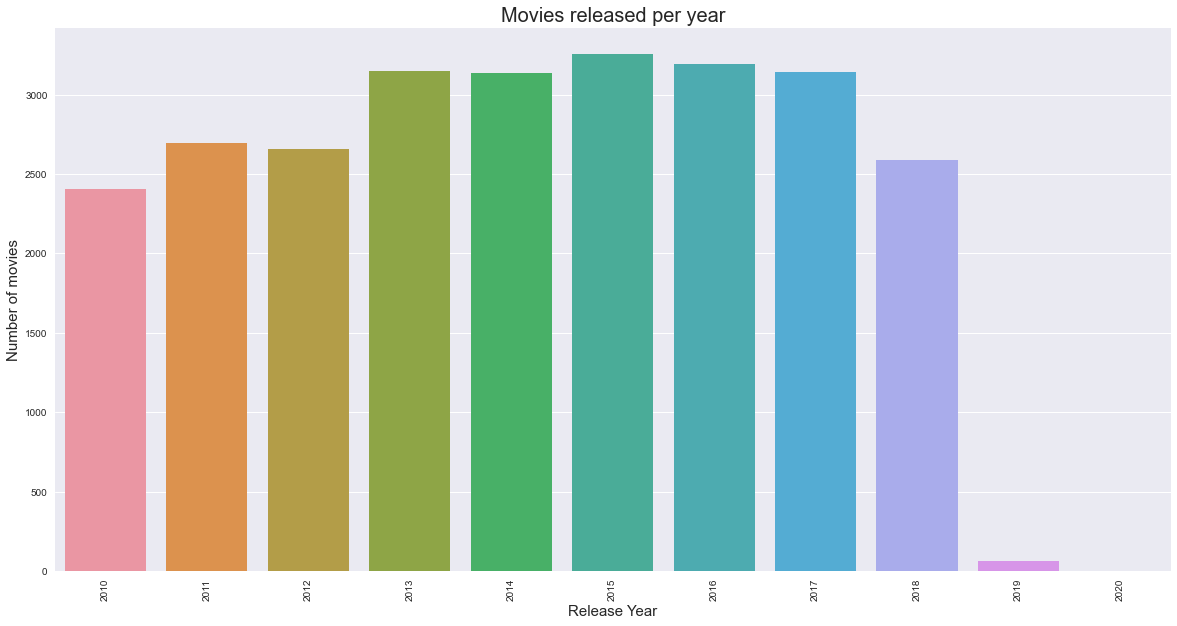

In [38]:
plt.figure(figsize=(20,10))


sns.countplot(df_new['Years'])

plt.title('Movies released per year', fontsize = 20)
plt.xlabel('Release Year', fontsize = 15)
plt.ylabel('Number of movies', fontsize = 15)
plt.xticks(rotation = 90)



plt.show()




**From the bar plot above, around an average of 3000 movies are produced every year from 2010 to 2018, which are the years included in our dataset.** 
**We can also draw the insignt that; though not linear, the number of movies released per year is gradually increasing.**

**Finding the correlation between a movies popularity and the average rating represented in the column vote average.**

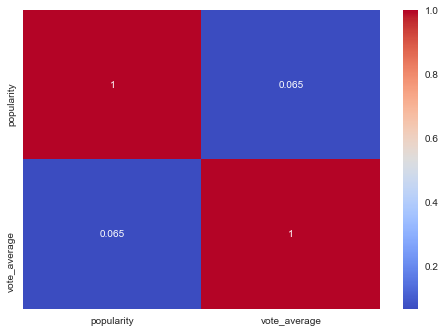

In [39]:
corr = tmdb_df[['popularity', 'vote_average']].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()


**From our heatmap diagram above, there is a very high correlation between the movie ratings and the popularity of a movie, meaning that the more popular a movie is, the higher the rating it gets.**

# MOVIE BUDGETS ANALYSIS

## Question 4: What is the relationship between the movie budget and the gross income generated?

To do this analysis I decided to do a scatter plot of the worldwide gross against the production costs to draw insights

**Load tn.movie_budgets.csv dataset**

In [40]:
movie_budgets_df = pd.read_csv("tn.movie_budgets.csv")
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


**.info() to show us a brief description of our data and thee columns subsequent datatypes**

In [41]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


**Noticing that our thre important columns are objects, we convert them to number values, float, and remove the dollar sign**

using that information, our important columns here are the production budget and the worldwide gross columns.

In [42]:
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].astype(str)
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].astype(str)

movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].str.replace('$', '').str.replace(',', '')
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].str.replace('$', '').str.replace(',', '')

movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].astype(float)
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].astype(float)

movie_budgets_df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09


**Plotting the scatter plot**

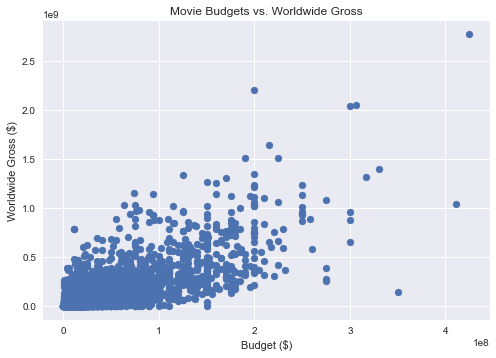

In [43]:
plt.scatter(movie_budgets_df['production_budget'], movie_budgets_df['worldwide_gross'])


plt.xlabel('Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.title('Movie Budgets vs. Worldwide Gross')


plt.show()

**The Scatter plot indicates a weaker positive relationship between the gross income and the budget of a movie. this being positive mens that if we pull together the right resources from our analysis, we can have an advantage in the investment and end up profitable.**

## Summary
After analyzing the data obtained from various sources such as the TMDB dataset, BOM movies, reviews, and movie budgets, several insights were identified to guide Microsoft's decision-making process for creating successful films. The analysis showed that the most successful genres at the box office were action, adventure, and science fiction. The analysis also highlighted the importance of having a high production budget for successful films. These findings provide actionable insights to guide Microsoft's new movie studio in creating successful films and competing in the highly competitive movie industry.